# 1. Постановка задачи

Требуется выполнить анализ данных некоторых пользователях из нескольких городов, а также об их поездках сервиса аренды самокатов GoFast Проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:  
   - без подписки:  
            абонентская плата отсутствует;
            стоимость одной минуты поездки — 8 рублей;
            стоимость старта (начала поездки) — 50 рублей;


   - с подпиской Ultra: 
            абонентская плата — 199 рублей в месяц;
            стоимость одной минуты поездки — 6 рублей;
            стоимость старта — бесплатно.

**Описание данных**  

В основных данных есть информация о пользователях, их поездках и подписках.

**Пользователи — users_go.csv**    
  
user_id	- уникальный идентификатор пользователя  
name - имя пользователя  
age - возраст  
city - город  
subscription_type - тип подписки (free, ultra)  

**Поездки — rides_go.csv**

user_id - уникальный идентификатор пользователя  
distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)  
duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»  
date - дата совершения поездки  

**Подписки — subscriptions_go.csv**  

subscription_type - тип подписки  
minute_price-стоимость одной минуты поездки по данной подписке  
start_ride_price-стоимость начала поездки  
subscription_fee-стоимость ежемесячного платежа  

# 2. Загрузка данных

## 2.1. Импорт данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
def read_df(pth1:str, pth2:str) -> pd.DataFrame:
    try:
        df = pd.read_csv(pth1)
    except OSError as e:
        df = pd.read_csv(pth2)     
    return df

In [3]:
pth1 = 'datasets/users_go.csv'
pth2 = 'https://code.s3.yandex.net/datasets/users_go.csv' 
users_go =  read_df(pth1,pth2)

In [4]:
pth1 = 'datasets/rides_go.csv'
pth2 = 'https://code.s3.yandex.net/datasets/rides_go.csv' 
rides_go =  read_df(pth1,pth2)

In [5]:
pth1 = 'datasets/subscriptions_go.csv'
pth2 = 'https://code.s3.yandex.net/datasets/subscriptions_go.csv' 
subscriptions_go = read_df(pth1,pth2)

## 2.2. Анализ данных

In [6]:
users_go.info()
users_go.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [7]:
rides_go.info()
rides_go.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [8]:
subscriptions_go.info()
subscriptions_go.head(10)
subscriptions_go.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


# 3. Предобработка данных

## 3.1. Столбец data

Приведем столбец data в датасете rides_go к типу date_time

In [9]:
rides_go['date'] =  pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

In [10]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [11]:
rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


## 3.2. Cтолбец с номером месяца на основе столбца date

In [12]:
rides_go['month'] = rides_go['date'].dt.month

In [13]:
rides_go.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


## 3.3. Пропущенные значения

По info() понятно, что пропущенных значений нет. Тем не менее

In [14]:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [15]:
rides_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [16]:
subscriptions_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Проверим дубликаты

### 3.3.1 users_go столбец city	

In [17]:
users_go['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Каких-то явных дубликатов нет, однако у пользователей может быть несколько аккаунтов. 

In [18]:
def accounts(df:pd.DataFrame) -> pd.DataFrame:               
        table =  pd.DataFrame(columns = {'name','count','city'})
        unique = df['name'].unique()        
        for i in range(len(unique)):
            count = df[df['name'] == unique[i]].age.duplicated().sum() 
            table.loc[i, 'name'] = unique[i]
            table.loc[i, 'count'] = count         
                        
        return table

In [19]:
users_go_duplicates = accounts(users_go)

In [20]:
users_go_duplicates[users_go_duplicates['count'] > 5]

,city,count,name
0,NaN,7,Кира
31,NaN,6,Иван
60,NaN,8,Никита
64,NaN,10,Анна
66,NaN,6,Вячеслав
97,NaN,6,Артемий
112,NaN,6,Михаил
135,NaN,6,Кирилл
152,NaN,9,Мария


In [21]:
users_go_duplicates[users_go_duplicates['count'] > 5].name.count()/users_go_duplicates.shape[0]

0.04639175257731959

4 процента таких записей. Скорее всего они разбросаны по разным городам

In [22]:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

### 3.3.2 rides_go. duration

In [23]:
rides_go.duration.describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

В столбце duration есть весомое количество значений 0.5 мин (95). Скорее всего это сбой при формировании датасета. Заполним медианой

In [24]:
def duration(df:pd.DataFrame) -> pd.DataFrame:
    for i in range(len(df['duration'])):
                   if df.loc[i,'duration'] == 0.5:
                       df.loc[i,'duration'] = df['duration'].median()
    return df

In [25]:
rides_go = duration(rides_go)

### 3.3.3 rides_go. distance

In [26]:
rides_go.distance.describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [27]:
rides_go.query('distance < 200 ').count()

user_id     170
distance    170
duration    170
date        170
month       170
dtype: int64

In [28]:
rides_go = rides_go[rides_go['distance'] > 200]

In [29]:
rides_go.describe()

,user_id,distance,duration,month
count,17898.000000,17898.000000,17898.000000,17898.000000
mean,840.030003,3098.805221,17.987631,6.483965
std,435.211402,1083.944105,5.900586,3.437806
min,1.000000,200.034777,2.480577,1.000000
25%,483.000000,2563.588392,13.802501,4.000000
50%,885.000000,3143.650015,17.744270,6.000000
75%,1212.000000,3787.101924,21.764322,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


**Вывод**: Другие дубликаты обнаружить не удалось

# 4. Исследовательский анализ данных

## 4.1. Частота встречаемости городов

In [30]:
users_go.city.value_counts(ascending= True)

Москва            172
Тюмень            185
Омск              186
Сочи              192
Краснодар         196
Ростов-на-Дону    202
Екатеринбург      206
Пятигорск         226
Name: city, dtype: int64

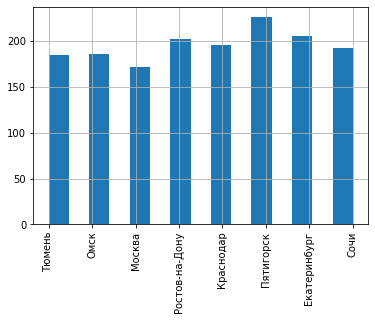

In [31]:
users_go.city.hist(bins =15);
plt.xticks(rotation='vertical');

Самый часто встерчающийся город - Пятигорск, за ним Екатеринбург и Ростов-на-Дону

## 4.2. Соотношение пользователей с подпиской и без подписки

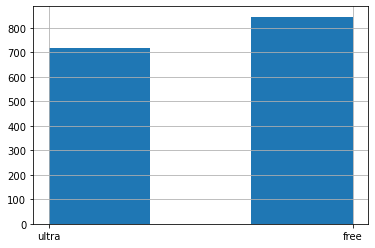

In [32]:
users_go.subscription_type.hist(bins=3);

In [33]:
relation_ultra = users_go.query('subscription_type == "ultra"').user_id.count()/users_go.user_id.count()  * 100
print(f'{relation_ultra} % пользователей с подпиской')

45.94249201277955 % пользователей с подпиской


In [34]:
relation_free = users_go.query('subscription_type == "free"').user_id.count()/users_go.user_id.count()  * 100
print(f'{relation_free} % пользователей без подписки')

54.05750798722045 % пользователей без подписки


~46 процентов пользователей (719) купили подписку 

## 4.3. Возраст пользователей

In [35]:
users_go.age.describe()

count    1565.000000
mean       24.922045
std         4.553496
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [36]:
users_go.age.mode()[0]

25

In [37]:
users_go.age.value_counts()

25    149
26    133
23    133
24    132
27    124
22    120
28    116
21     94
29     72
20     72
30     70
19     49
31     48
18     46
32     41
33     40
17     26
16     19
34     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

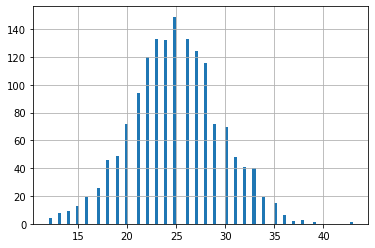

In [38]:
users_go.age.hist(bins=100);

Самый частовстречающийся возраст (мода) - 25 лет. Минимальный -12, максимальный 43. На данном промежутке возраст имеет характер нормального распределения

 ## 4.4. Расстояние, которое пользователь преодолел за одну поездку

In [39]:
rides_go.distance.describe()

count    17898.000000
mean      3098.805221
std       1083.944105
min        200.034777
25%       2563.588392
50%       3143.650015
75%       3787.101924
max       7211.007745
Name: distance, dtype: float64

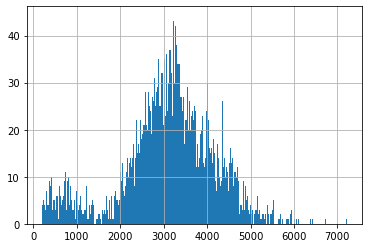

In [40]:
rides_go.distance.hist(bins=2000);

Дистанции поездок находятся в диапазоне Самая частая дистанция ~3070 метров. Тем менее есть значительное увеличение числа поездок в промежутке от 0 до 1000 метров.

## 4.5. Продолжительность поездок.

In [41]:
rides_go.duration.describe()

count    17898.000000
mean        17.987631
std          5.900586
min          2.480577
25%         13.802501
50%         17.744270
75%         21.764322
max         40.823963
Name: duration, dtype: float64

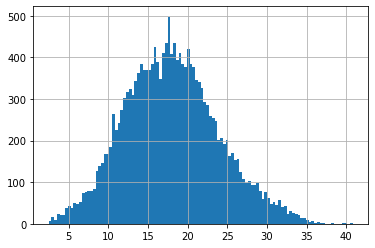

In [42]:
rides_go.duration.hist(bins=110);

Дистанции поездок находятся в диапазоне Самая частая дистанция ~3070 метров. Тем менее есть значительное увеличение числа поездок в промежутке от 0 до 1000 метров.

# 5. Объединение данных

## 5.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. 

In [43]:
merged_users = users_go.merge(rides_go, how= 'outer')

In [44]:
merged_users = merged_users.merge(subscriptions_go, how= 'outer')

In [45]:
merged_users.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [46]:
merged_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

## 5.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 5.1:

c данными о пользователях без подписки;

In [47]:
users_free = merged_users[merged_users['subscription_type'] == 'free']
users_free.sample(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
15719,1358,Владимир,23,Тюмень,free,4385.761474,15.746137,2021-09-01,9,8,50,0
12536,1128,Георгий,27,Краснодар,free,1638.683414,18.681953,2021-01-12,1,8,50,0
15741,1359,Станислав,29,Сочи,free,2980.743300,23.258600,2021-12-26,12,8,50,0
16228,1393,Богдан,23,Краснодар,free,4008.045584,17.619309,2021-07-14,7,8,50,0
7851,785,Петр,28,Омск,free,2027.713213,21.060254,2021-09-10,9,8,50,0
14648,1275,Виталина,26,Тюмень,free,3905.604545,29.738305,2021-08-21,8,8,50,0
11732,1067,Мария,18,Омск,free,3414.561562,30.072808,2021-04-24,4,8,50,0
9807,929,Василина,23,Краснодар,free,3975.831369,20.541995,2021-03-11,3,8,50,0
11584,1056,Милена,27,Пятигорск,free,2829.717047,16.611439,2021-07-01,7,8,50,0
9449,906,Есения,32,Сочи,free,2567.986252,18.706636,2021-03-18,3,8,50,0


с данными о пользователях с подпиской.

In [48]:
users_ultra = merged_users[merged_users['subscription_type'] == 'ultra']
users_ultra.sample(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
5093,534,Дмитрий,33,Москва,ultra,4346.872294,23.062488,2021-06-23,6,6,0,199
1761,182,Агата,32,Краснодар,ultra,3341.869607,19.322298,2021-09-21,9,6,0,199
3856,402,Эльмира,21,Екатеринбург,ultra,3058.791486,17.795735,2021-06-01,6,6,0,199
3224,334,Мария,23,Тюмень,ultra,4222.038588,20.047226,2021-11-12,11,6,0,199
1302,134,Людмила,28,Москва,ultra,2918.105132,23.299195,2021-08-12,8,6,0,199
4524,472,Павел,27,Краснодар,ultra,2785.461155,20.141845,2021-04-09,4,6,0,199
1544,160,Евгения,25,Краснодар,ultra,2350.944030,8.642266,2021-02-24,2,6,0,199
4945,518,Алиса,22,Ростов-на-Дону,ultra,4081.456628,32.488740,2021-01-10,1,6,0,199
5745,598,Кира,21,Пятигорск,ultra,3348.753129,14.819129,2021-07-16,7,6,0,199
4510,470,Ростислав,25,Краснодар,ultra,1412.437958,16.296642,2021-11-19,11,6,0,199


## 5.3 Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

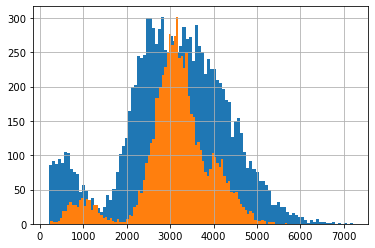

In [49]:
users_free['distance'].hist(bins=100);
users_ultra['distance'].hist(bins=100);

In [50]:
users_free['distance'].describe()

count    11543.000000
mean      3089.389043
std       1202.128363
min        200.034777
25%       2402.642050
50%       3136.095431
75%       3919.993812
max       7211.007745
Name: distance, dtype: float64

In [51]:
users_ultra['distance'].describe()

count    6672.000000
mean     3115.434963
std       836.686986
min       244.210438
25%      2785.359959
50%      3148.731011
75%      3559.725229
max      5699.769662
Name: distance, dtype: float64

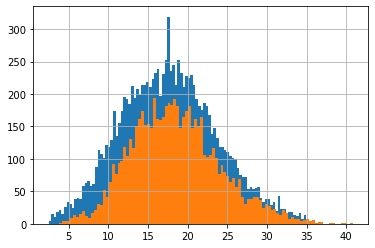

In [52]:
users_free['duration'].hist(bins=100);
users_ultra['duration'].hist(bins=100);

In [53]:
users_free['duration'].describe()

count    11543.000000
mean        17.674307
std          6.058844
min          2.480577
25%         13.305616
50%         17.576376
75%         21.679843
max         34.948498
Name: duration, dtype: float64

In [54]:
users_ultra['duration'].describe()

count    6672.000000
mean       18.531419
std         5.572656
min         3.760353
25%        14.498947
50%        18.178153
75%        21.887063
max        40.823963
Name: duration, dtype: float64

По гистограммам можно сделать вывод о схожем характере продолжительности и дистанции поездки для пользователей с подпиской и без

# 6. Подсчёт выручки

## 6.1. Cуммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 5

In [55]:
merged_users['duration'] = np.ceil(merged_users['duration']) 

In [56]:
result= merged_users.groupby(['user_id', 'month'])

In [57]:
def sums(df:pd.DataFrame) -> pd.DataFrame:    
    for user in df.user_id.unique():  
            table = df[df['user_id'] == user]
            df.loc[df.user_id == user, 'distance_sum'] =  table.distance.sum()
            df.loc[df.user_id == user, 'duration_sum'] =  table.duration.sum()
            df.loc[df.user_id == user, 'number_of_rides'] = table.shape[0]
    df['number_of_rides'] = df['number_of_rides'].astype(int)
    return df

In [58]:
result = sums(merged_users)

In [59]:
result.info()
result.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18215 entries, 0 to 18214
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18215 non-null  int64         
 1   name               18215 non-null  object        
 2   age                18215 non-null  int64         
 3   city               18215 non-null  object        
 4   subscription_type  18215 non-null  object        
 5   distance           18215 non-null  float64       
 6   duration           18215 non-null  float64       
 7   date               18215 non-null  datetime64[ns]
 8   month              18215 non-null  int64         
 9   minute_price       18215 non-null  int64         
 10  start_ride_price   18215 non-null  int64         
 11  subscription_fee   18215 non-null  int64         
 12  distance_sum       18215 non-null  float64       
 13  duration_sum       18215 non-null  float64       
 14  number

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee,distance_sum,duration_sum,number_of_rides
6348,663,Евгения,24,Москва,ultra,4238.190733,16.0,2021-04-15,4,6,0,199,17733.145474,86.0,5
12139,1097,Игнат,25,Сочи,free,3143.720584,19.0,2021-12-19,12,8,50,0,37525.981639,208.0,12
17185,1461,Вероника,19,Москва,free,2584.864860,17.0,2021-01-24,1,8,50,0,22289.581686,122.0,7
4350,454,Вероника,38,Краснодар,ultra,3141.965815,21.0,2021-09-11,9,6,0,199,21336.381643,151.0,7
4262,445,Людмила,26,Москва,ultra,1636.633797,22.0,2021-04-29,4,6,0,199,23868.218784,162.0,8
11996,1087,Петр,29,Ростов-на-Дону,free,4471.497111,25.0,2021-04-26,4,8,50,0,46629.019554,278.0,17
474,49,Одиссей,17,Ростов-на-Дону,ultra,3134.361969,23.0,2021-04-10,4,6,0,199,32309.366217,223.0,11
12752,1144,Герман,28,Тюмень,free,2335.947244,11.0,2021-07-20,7,8,50,0,25272.319118,157.0,9
16603,1419,Яромир,21,Екатеринбург,free,4206.807520,31.0,2021-05-29,5,8,50,0,71033.076715,410.0,20
7417,752,Роберт,26,Ростов-на-Дону,free,287.196977,16.0,2021-05-24,5,8,50,0,27582.927876,186.0,11


## 6.2. Помесячная выручка

In [60]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18215 entries, 0 to 18214
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18215 non-null  int64         
 1   name               18215 non-null  object        
 2   age                18215 non-null  int64         
 3   city               18215 non-null  object        
 4   subscription_type  18215 non-null  object        
 5   distance           18215 non-null  float64       
 6   duration           18215 non-null  float64       
 7   date               18215 non-null  datetime64[ns]
 8   month              18215 non-null  int64         
 9   minute_price       18215 non-null  int64         
 10  start_ride_price   18215 non-null  int64         
 11  subscription_fee   18215 non-null  int64         
 12  distance_sum       18215 non-null  float64       
 13  duration_sum       18215 non-null  float64       
 14  number

In [61]:
def profit(df:pd.DataFrame) -> pd.DataFrame:
    for user_id in df.user_id.unique():  
            table = df[df['user_id'] == user_id]
            df.loc[df.user_id == user_id, 'profit'] = (table['start_ride_price'].mean() *  table.shape[0] +
                table.duration.sum() * table['minute_price'].mean()
                                                       + table['subscription_fee'].mean())
                                                     
                                   
    
    return result

In [62]:
profit(result)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee,distance_sum,duration_sum,number_of_rides,profit
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199,34070.182066,211.0,12,1465.0
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199,34070.182066,211.0,12,1465.0
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199,34070.182066,211.0,12,1465.0
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199,34070.182066,211.0,12,1465.0
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199,34070.182066,211.0,12,1465.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18210,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0,41702.995378,229.0,12,2432.0
18211,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0,41702.995378,229.0,12,2432.0
18212,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0,41702.995378,229.0,12,2432.0
18213,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0,41702.995378,229.0,12,2432.0


In [63]:
result.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee,distance_sum,duration_sum,number_of_rides,profit
count,18215.000000,18215.000000,18215.000000,18215.000000,18215.000000,18215.000000,18215.000000,18215.000000,18215.000000,18215.000000,18215.000000,18215.000000
mean,836.146088,24.905792,3098.929442,18.483942,6.486302,7.267417,31.685424,72.892012,41791.123179,248.450288,13.485095,2384.899259
std,435.752016,4.569152,1082.730234,5.906509,3.436975,0.963607,24.090184,95.878932,15207.950106,88.189050,4.699103,1056.739684
min,1.000000,12.000000,200.034777,3.000000,1.000000,6.000000,0.000000,0.000000,5530.344048,35.000000,2.000000,409.000000
25%,475.000000,22.000000,2566.563078,14.000000,4.000000,6.000000,0.000000,0.000000,31659.886690,191.000000,10.000000,1513.500000
50%,881.000000,25.000000,3143.579446,18.000000,6.000000,8.000000,50.000000,0.000000,40322.715175,238.000000,13.000000,2314.000000
75%,1208.000000,28.000000,3781.936237,22.000000,9.000000,8.000000,50.000000,199.000000,49969.519925,296.000000,16.000000,3074.000000
max,1534.000000,43.000000,7211.007745,41.000000,12.000000,8.000000,50.000000,199.000000,132594.990640,772.000000,40.000000,8176.000000


# 7. Проверка гипотез

## 7.1 Пользователи с подпиской тратят больше времени на поездки? 

In [64]:
print('Медианное время пользователей без подписки:', result[result['subscription_fee'] == 0].duration.mean())

Медианное время пользователей без подписки: 18.170233041670276


In [65]:
print('Медианное  время пользователей c подпиской:', result[result['subscription_fee'] != 0].duration.mean())

Медианное  время пользователей c подпиской: 19.026678657074342


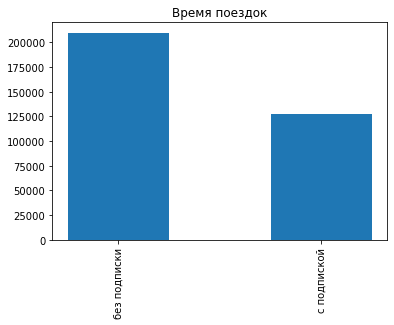

In [66]:
fig, ax  = plt.subplots()
ax.bar([1, 3], [result[result['subscription_type'] == 'free'].
            duration.sum(), result[result['subscription_type'] == 'ultra'].duration.sum()], width=1,
       tick_label=['без подписки', 'c подпиской'], align='center')
plt.xticks(rotation=90);
plt.title('Время поездок');

In [67]:
alpha = 0.05 

results = (st.ttest_ind(result[result['subscription_type'] == 'ultra'].duration, 
                        result[result['subscription_type'] == 'free'].duration, 
                        alternative='two-sided'))

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 3.7411049897894494e-21
Отвергаем нулевую гипотезу


Суммарное время пользователей без почти в 2 раза больше. Проверим какие пользователи выгоднее

In [68]:
print('Выручка от пользователя c подпиской:', result[result['subscription_type'] == 'ultra'].profit.mean())

Выручка от пользователя c подпиской: 1436.101618705036


In [69]:
print('Выручка от пользователя без подписки:', result[result['subscription_type'] == 'free'].profit.mean())

Выручка от пользователя без подписки: 2933.3162955904013


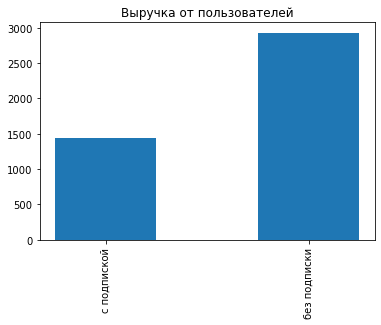

In [70]:
fig, ax  = plt.subplots()
ax.bar([1, 3], [result[result['subscription_type'] == 'ultra'].profit.mean(),
       result[result['subscription_type'] == 'free'].profit.mean()], width=1,
       tick_label=['c подпиской', 'без подписки'], align='center')
plt.xticks(rotation=90);
plt.title('Выручка от пользователей');

**Вывод:** Пользователи с подпиской приносят меньше денег из-за их меньшего количества. Медианное время для пользователя с подпиской и без практически одинаково. Гипотеза не подтвердилась

## 7.2 Расстояние одной поездки в среднем не превышает 3130 метров

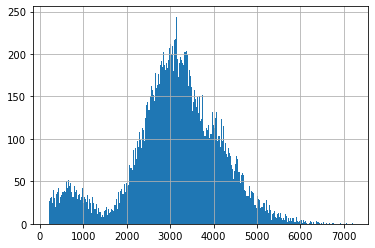

In [71]:
result.distance.hist(bins = 300);

In [72]:
result.distance.describe()

count    18215.000000
mean      3098.929442
std       1082.730234
min        200.034777
25%       2566.563078
50%       3143.579446
75%       3781.936237
max       7211.007745
Name: distance, dtype: float64

In [73]:
result.distance.mode().mean()

3105.9430758817907

In [74]:
optimal_value = 3130 

alpha = 0.05 

results = st.ttest_1samp(
    result.distance, 
    optimal_value)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем гипотезу')
else:
    print('Не получилось отвергнуть гипотезу')

p-значение: 0.00010789589321770272
Отвергаем гипотезу


**Вывод**: Хотя среднее расстояние поездки не превышает 3130 метров, гипотезу отвергаем 

## 7.3 Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Посмотрим как менялась выручка по месяцам от разных категорий пользователей

Text(0, 0.5, 'profit')

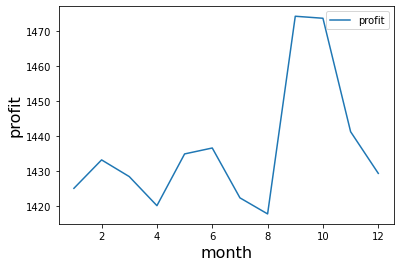

In [75]:
ultra_per_month = (result[result['subscription_type'] == 'ultra']
                   .pivot_table(index = 'month', values= 'profit')
                   .reset_index(drop= False));

ultra_per_month.plot(x='month', y='profit' ,kind= 'line');
plt.xlabel('month', fontsize = 16)
plt.ylabel('profit', fontsize = 16)

Text(0, 0.5, 'profit')

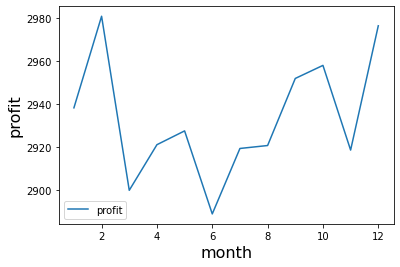

In [76]:
free_per_month = (result[result['subscription_type'] == 'free']
                   .pivot_table(index = 'month', values= 'profit')
                   .reset_index(drop= False));

free_per_month.plot(x='month', y='profit' ,kind= 'line');
plt.xlabel('month', fontsize = 16)
plt.ylabel('profit', fontsize = 16)

Динамика по типу подписки совершенно разная

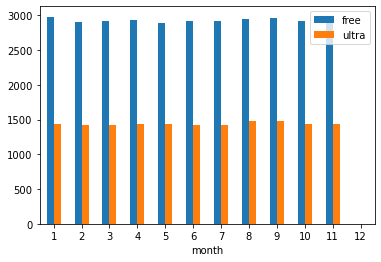

In [77]:
plot_profit = pd.DataFrame({'free': free_per_month.profit,
                   'ultra': ultra_per_month.profit}, index=ultra_per_month.month)
ax = plot_profit.plot.bar(rot=0)

In [78]:
alpha = 0.05 

results = (st.ttest_ind(ultra_per_month.profit, 
                        free_per_month.profit, 
                        alternative='two-sided'))

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 9.760913010303866e-35
Отвергаем нулевую гипотезу


**Вывод**: Гипотеза не подтвердилась. По каждому месяцу у пользователей с подпиской выручка меньше чем у пользователей без подписки

## 7.4. Текстовый вопрос

**Вопрос:**
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:**
По сути это проверка равенства среднего значения генеральной совокупности до и после изменения. Необходимо провести Т-тест для парной выборки (scipy.stats.ttest_rel)

# 8. Общий вывод

#### 8.1. Цель работы: 

Выполнить анализ данных некоторых пользователях из нескольких городов, а также об их поездках сервиса аренды самокатов GoFast Проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Проверяемые гипотезы:

- Пользователи с подпиской тратят больше времени на поездки.
- Пользователи с подпиской могут «выгоднее» для компании.
- Среднее расстояние одной поездки - 3130 м
- Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки


##### 8.2. Анализ и предобработка данных представленного датасета

В ходе анализа и предобработки данных было выявлено следующее:

    - неверный тип переменны в столбце date
    - В столбце duration есть весомое количество значений 0.5 мин (95)

Скорее всего это результат ошибки при конвертации между ПО

Тип переменных в столбце date был изменен на datetime, значения продолжительности поездки в 0.5 минут были заполнены медианными значениями

Так же столбец users_id был проверен на наличие неявных дубликатов (несколько аккаунтов на одного пользователя).  
В ходе проверки выяснилось, что доля данных аккаунтов очень мала

Пропущенных значений в ходе анализа не обнаружено.

##### 8.3. Исследовательский анализ данных

В ходе исследовательского анализа данных была описана и  визуализирована общая информация о пользователях и поездках.
Выводы и гистограммы даны в пункте4

##### 8.4. Проверка гипотез

**Гипотеза 1.** Пользователи с подпиской тратят больше времени на поездки.

In [79]:
Гипотеза не подтвердилась. Суммарно пользователи без подписки тратят больше времени на поездки чем пользователи с подпиской  
(так как пользователей с подпиской больше). 

SyntaxError: invalid syntax (811565515.py, line 1)

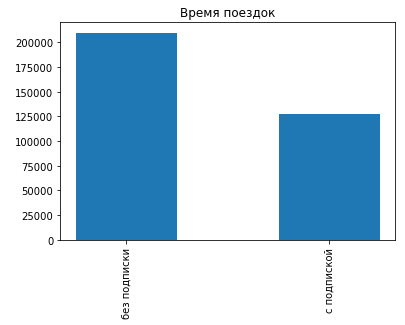

**Гипотеза 2.** Пользователи с подпиской "выгоднее" чем без

Гипотеза не подтвердилась. Выручка от пользователей с без подписи в среднем больше

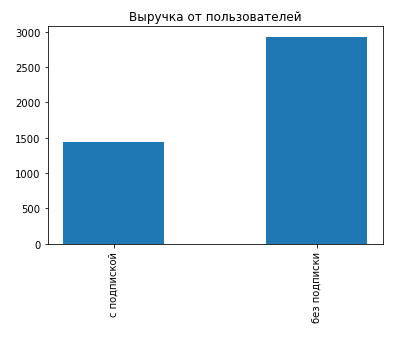

**Гипотеза 3.** Среднее расстояние одной поездки - 3130 м

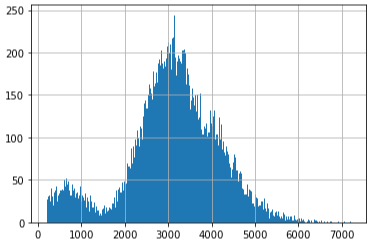

Хотя медианное значение меньше 3130 метров, гипотезу отвергаем так как не прошла Т-тест

**Гипотеза 4** Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

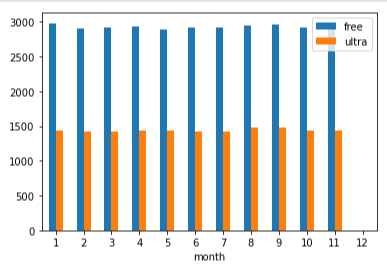

Гипотезу отвергаем. Выручка от пользователей без подписки выше